In [261]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model

mp.__version__

'3.2.2'

## Régression linéaire simple Scikit Learn

In [231]:
df = pd.read_csv('reg_simple.csv')
df

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30
7,9,21
8,10,32
9,11,34


In [232]:
x = df['heure_rev']
y = df['note']

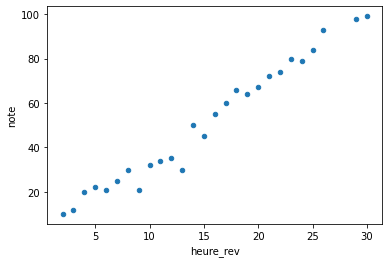

In [233]:
df.plot.scatter('heure_rev', 'note')


#df.plot.scatter(x='heure_rev', y='note')


In [234]:
X = df.iloc[:,0].values.reshape(-1,1)
Y = df.iloc[:,1].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(27,)
(27,)


In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [236]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [237]:
pred = regressor.predict(X)
y_pred = regressor.predict(X_test)
y_pred1= regressor.predict(X_train)

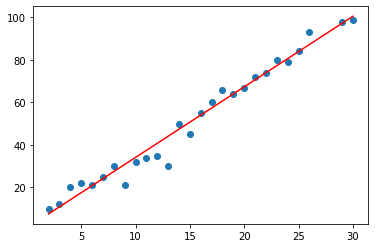

In [238]:
#plt.scatter(X,Y)
#plt.plot(X,pred, c='r')
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_pred1, c='r')
plt.xlabel('heures')
plt.ylabel('note')

Text(0, 0.5, 'note')

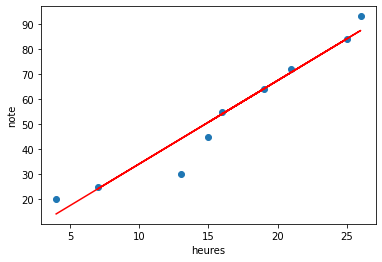

In [239]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('heures')
plt.ylabel('note')

In [240]:
#print(regressor.score(X,Y))
print(regressor.score(X_train, Y_train))
print(regressor.score(X_test, Y_test))

0.9732449757831861
0.9837077938544782
0.9452276990107952


In [241]:
print(mean_squared_error(Y_test, y_pred).round(3))
print(mean_absolute_error(Y_test, y_pred).round(3))

33.469
3.836


## Régression multiple manuelle

In [243]:
df = pd.read_csv('boston_house_prices.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [244]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

Text(0, 0.5, 'MEDV')

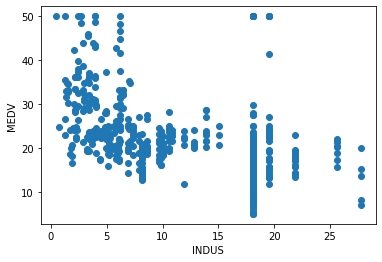

In [245]:
plt.scatter(x[:,2],y)
plt.xlabel('INDUS')
plt.ylabel('MEDV')

In [246]:
X = np.hstack((x,np.ones((x.shape[0], 1))))

print(X.shape)
#théta
theta = np.random.randn(14,1)

(506, 14)


In [247]:
def model(X, theta):
    return X.dot(theta)

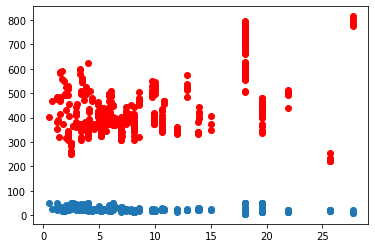

In [248]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],model(X,theta), c='r')

In [249]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [250]:
cost_function(X,y,theta)

119433.31056933218

In [251]:
# gradient
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [252]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

In [253]:
n_iterations = 500000
learning_rate = 0.0000063

theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)

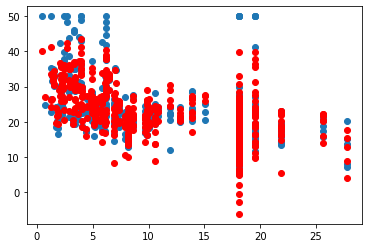

In [254]:
#vecteur prediction
predictions = model(X,theta_final)

plt.scatter(x[:,2],y)
plt.scatter(x[:,2],predictions, c='r')

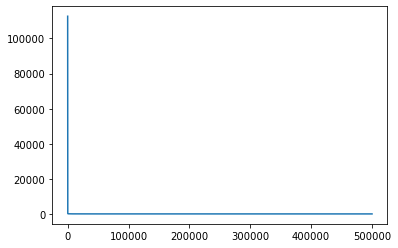

In [255]:
#courbe d'apprentissage
plt.plot(range(n_iterations),cost_history)

In [256]:
#éval finale
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y- y.mean())**2).sum()
    return 1-u/v

In [257]:
coef_determination(y, predictions)

0.703623641677352

In [258]:
print(mean_squared_error(y, predictions).round(3))

25.02


## Régression multiple Scikit learn

In [266]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

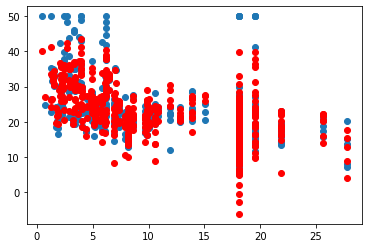

In [273]:

pred=model.predict(x)

plt.scatter(x[:,2],y)
plt.scatter(x[:,2],predictions, c='r')


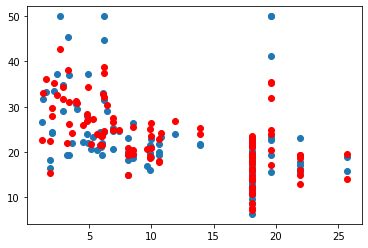

In [269]:
y_pred = model.predict(x_test)

plt.scatter(x_test[:,2],y_test)
plt.scatter(x_test[:,2],y_pred, c='r')

In [270]:
mean_squared_error(y_test,y_pred)

16.94307301383367

In [274]:
mean_squared_error(y,pred)

22.107294589834463

In [275]:
model.score(x,y)

0.7381259083032994

## Régression Polynomiale  manuelle:

In [289]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


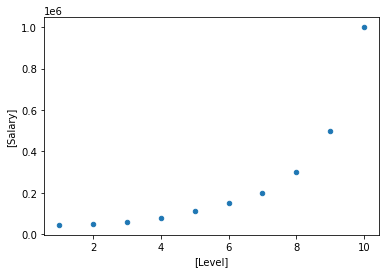

In [290]:
df.plot.scatter(['Level'], ['Salary'])

In [291]:
x =df['Level']
y =df['Salary']

#redimentionner
x = df.iloc[:, 1:2].values.reshape(-1,1)
y = df.iloc[:, 2].values.reshape(-1,1)
# création matrice
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2, X))
X = np.hstack((x**3, X))
X = np.hstack((x**4, X))
X = np.hstack((x**5, X))

print(X.shape)
#théta
theta = np.random.randn(6,1)

(10, 6)


In [292]:
def model(X,theta):
    return X.dot(theta)

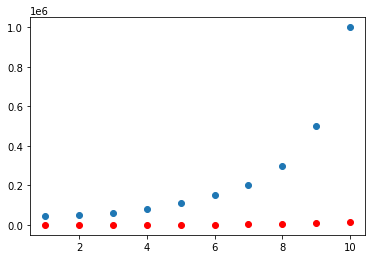

In [293]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], model(X,theta), c='r')

In [294]:
#fonction cout
def cost_function(X,y,theta):
    m=len(y)
    return (1/2*m)*np.sum((model(X,theta)-y)**2)

In [295]:
cost_function(X,y,theta)

6891859909826.764

In [296]:
# gradient
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [297]:

def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history
print(theta)
print(learning_rate)
print(grad(X,y,theta))

[[ 0.06509901]
 [ 0.92268303]
 [ 1.42186678]
 [-1.05174298]
 [-1.18819368]
 [-0.06687248]]
9.5e-10
[[-1.41683991e+10]
 [-1.49982233e+09]
 [-1.60988288e+08]
 [-1.76428822e+07]
 [-2.00300788e+06]
 [-2.45341998e+05]]


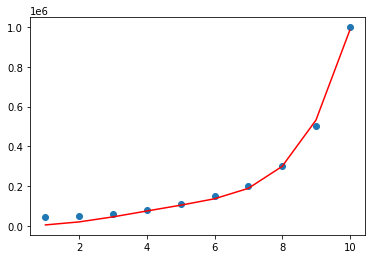

In [306]:
n_iterations = 10000000
learning_rate = 0.00000000095
#degré 2
#n_iterations = 150000
#learning_rate = 0.00075

theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
theta_final
#vecteur prediction
predictions = model(X,theta_final)

plt.scatter(x[:,0],y)
plt.plot(x[:,0],predictions, c='r')

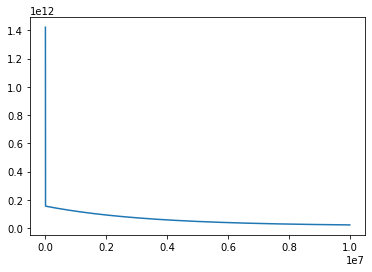

In [307]:
#courbe d'apprentissage
plt.plot(range(n_iterations),cost_history)

In [308]:
#éval finale
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y- y.mean())**2).sum()
    return 1-u/v

coef_determination(y, predictions)

0.9944105133148727

In [309]:
print(mean_squared_error(y, predictions).round(3))

450860572.367


## Régression polynomiale scikitlearn


In [311]:
dataset = pd.read_csv('Salaire_Level.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## 2. Notre variable target (Y) est le salaire, Récuprer X et Y à partir du jeu de données 

In [312]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values.reshape(-1,1)



In [313]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

## 3. Créer votre modèle LinearRegression et entraînez le sur le jeu de données

In [314]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)


pred= lin_reg.predict(X)

## 4. Visualisation des résultats du modèle LinearRegression sur le jeu de données

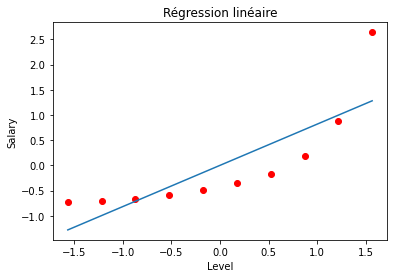

In [315]:
plt.scatter(X,y, color="red")
plt.plot(X, pred)
plt.title("Régression linéaire")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()


## 5. Créer votre modèle Regression polynomiale et entraînez le sur le jeu de données, essayer avec différentes valeurs pour le degré (1..5). Visualiser dans la même figure les résultats du modèle pour les différents degrés. Quelle est la meilleure valeur pour le degré ?


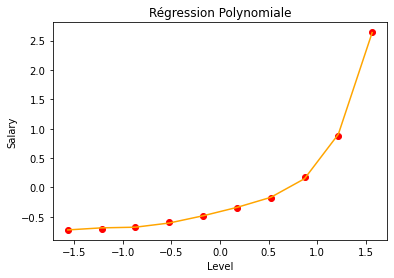

In [316]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=1).fit_transform(X)
X_poly2 = PolynomialFeatures(degree=2).fit_transform(X)
X_poly3 = PolynomialFeatures(degree=3).fit_transform(X)
X_poly4 = PolynomialFeatures(degree=4).fit_transform(X)
X_poly5 = PolynomialFeatures(degree=5).fit_transform(X)


lin_reg_1 = LinearRegression().fit(X_poly,y)
lin_reg_2 = LinearRegression().fit(X_poly2,y)
lin_reg_3 = LinearRegression().fit(X_poly3,y)
lin_reg_4 = LinearRegression().fit(X_poly4,y)
lin_reg_5 = LinearRegression().fit(X_poly5,y)


plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_1.predict(X_poly), c='green')
plt.plot(X, lin_reg_2.predict(X_poly2), c='b')
plt.plot(X, lin_reg_3.predict(X_poly3), c='r')
plt.plot(X, lin_reg_4.predict(X_poly4), c='pink')
plt.plot(X, lin_reg_5.predict(X_poly5), c='orange')
plt.title("Régression Polynomiale")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()



In [317]:
print()
print(lin_reg_1.score(X_poly,y))
print("degré 2")
print(lin_reg_2.score(X_poly2,y))
print("degré 3")
print(lin_reg_3.score(X_poly3,y))
print("degré 4")
print(lin_reg_4.score(X_poly4,y))
print("degré 5")
print(lin_reg_5.score(X_poly5,y))



0.6690412331929894
degré 2
0.9162082221443943
degré 3
0.9812097727913367
degré 4
0.9973922891706614
degré 5
0.9997969027099755


In [318]:
print(mean_squared_error(y, pred).round(3))

0.331
